In [8]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def synthetic_data(w, b, num_examples):
  X = tf.zeros((num_examples, w.shape[0]))
  X += tf.random.normal(shape=X.shape)
  y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
  y += tf.random.normal(shape=y.shape, stddev=0.01)
  y = tf.reshape(y, (-1, 1))
  return X, y

In [9]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

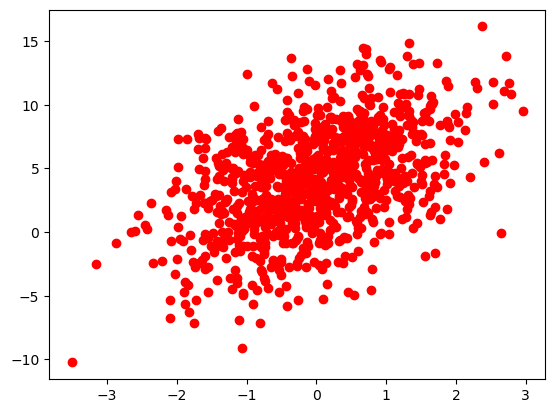

In [16]:
plt.plot(features[:,0], labels, 'ro')

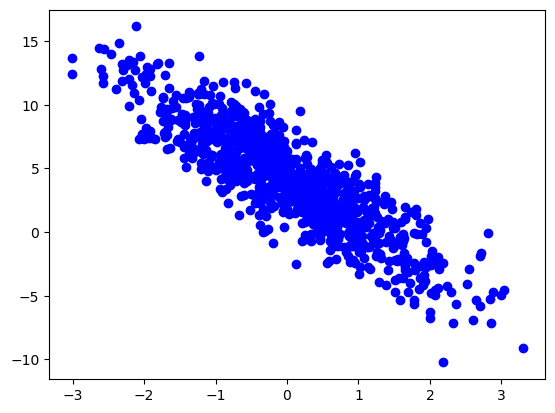

In [20]:
plt.plot(features[:,1], labels, 'bo')

In [17]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = tf.constant(indices[i: min(i + batch_size, num_examples)])
    yield tf.gather(features, j), tf.gather(labels, j)

In [19]:
batch_size = 5

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tf.Tensor(
[[ 1.8270609   0.7337363 ]
 [-0.13389455 -0.304782  ]
 [-0.21655294  0.60715955]
 [-0.98988706 -1.2521077 ]
 [ 0.8596138  -0.5298669 ]], shape=(5, 2), dtype=float32) 
 tf.Tensor(
[[5.36371  ]
 [4.980469 ]
 [1.6997005]
 [6.4791403]
 [7.739326 ]], shape=(5, 1), dtype=float32)


In [ ]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [22]:
def linreg(X, w, b):
  return tf.matmul(X, w) + b

In [23]:
def squared_loss(y_hat, y):
  return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [24]:
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr * grad / batch_size)

In [26]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [27]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      l = loss(net(X, w, b), y)
    dw, db = g.gradient(l, [w, b])
    sgd([w, b], [dw, db], lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.000137
epoch 2, loss 0.000055
epoch 3, loss 0.000055


In [30]:
print(f'true_w - b = {true_w - tf.reshape(w, true_w.shape)}')
print(f'true_b - b = {true_b - b}')

true_w - b = [ 0.0006454  -0.00048018]
true_b - b = [-0.00061798]
